In [23]:
from sklearn import ensemble, model_selection, metrics, datasets, tree

import numpy as np
import pandas as pd

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
data = datasets.load_digits()

In [20]:
X = data.data
y = data.target

In [22]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, y, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [30]:
def write_answer_1(answer):
    with open("bagging_task_answer1.txt", "w") as fout:
        fout.write(str(answer))

In [38]:
new_tree = tree.DecisionTreeClassifier()
answer1 = model_selection.cross_val_score(new_tree, X, y, cv=10, n_jobs = -1).mean()
write_answer_1(answer1)

0.83199056733832921

In [39]:
def write_answer_2(answer):
    with open("bagging_task_answer2.txt", "w") as fout:
        fout.write(str(answer))

In [40]:
bagging = ensemble.BaggingClassifier(new_tree, n_estimators = 100)
answer2 = model_selection.cross_val_score(bagging, X, y, cv=10, n_jobs = -1).mean()
write_answer_2(answer2)

In [41]:
def write_answer_3(answer):
    with open("bagging_task_answer3.txt", "w") as fout:
        fout.write(str(answer))

In [42]:
bagging1 = ensemble.BaggingClassifier(new_tree, n_estimators = 100, max_features=int(np.sqrt(X.shape[1])))
answer3 = model_selection.cross_val_score(bagging1, X, y, cv=10, n_jobs = -1).mean()
write_answer_3(answer3)

In [43]:
def write_answer_4(answer):
    with open("bagging_task_answer4.txt", "w") as fout:
        fout.write(str(answer))

In [44]:
new_tree1 = tree.DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))
bagging2 = ensemble.BaggingClassifier(new_tree1, n_estimators = 100)
answer4 = model_selection.cross_val_score(bagging2, X, y, cv=10, n_jobs = -1).mean()
write_answer_4(answer4)

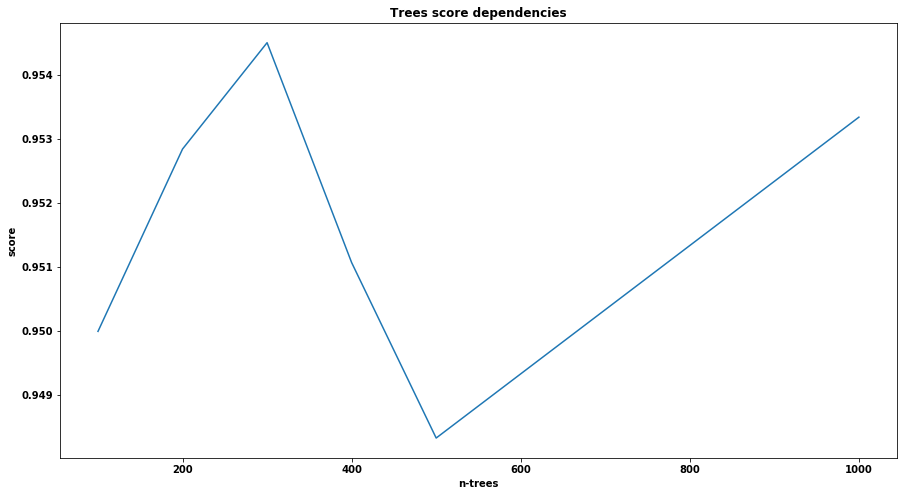

Wall time: 30.8 s


In [47]:
%%time
trees = [100, 200, 300, 400, 500, 1000]
results = []
for tree in trees:
    new_tree = ensemble.RandomForestClassifier(n_estimators=tree)
    answer = model_selection.cross_val_score(new_tree, X, y, cv=10, n_jobs = -1).mean()
    results.append(answer)
plt.figure(figsize=(15, 8))
plt.plot(trees, results)
plt.xlabel("n-trees")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

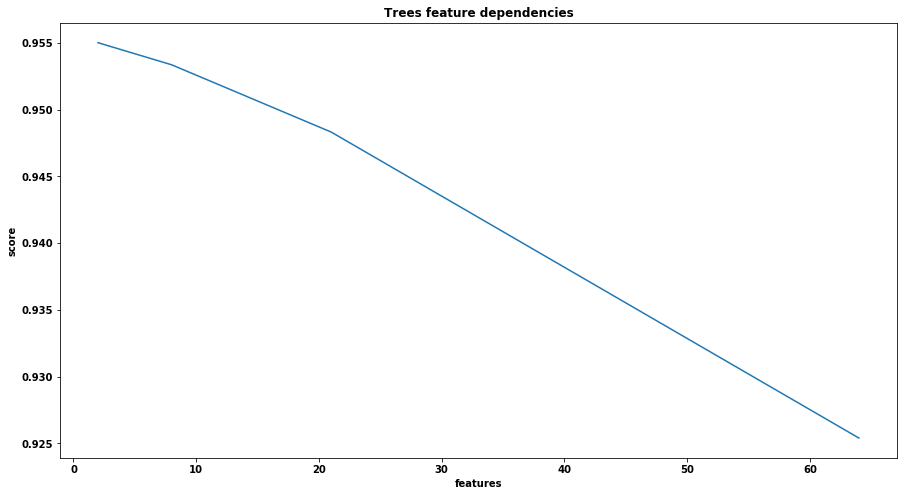

Wall time: 22.5 s


In [49]:
%%time
feature = X.shape[1]
new_features = [2, int(np.sqrt(feature)), int(feature/3), feature]
results1 = []
for feat in new_features:
    new_tree = ensemble.RandomForestClassifier(n_estimators=300, max_features = feat)
    answer = model_selection.cross_val_score(new_tree, X, y, cv=10, n_jobs = -1).mean()
    results1.append(answer)
plt.figure(figsize=(15, 8))
plt.plot(new_features, results1)
plt.xlabel("features")
plt.ylabel("score")
plt.title("Trees feature dependencies")
plt.show()

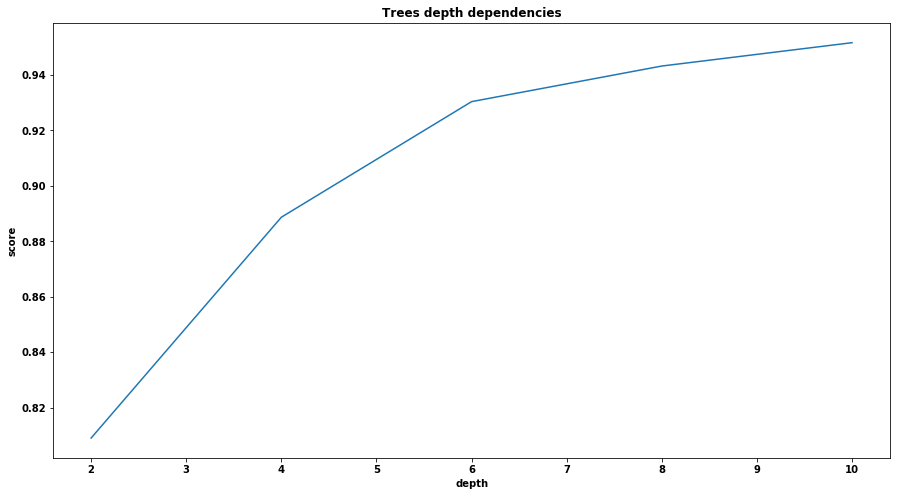

Wall time: 14.3 s


In [50]:
%%time
depth = X.shape[1]
new_depth = [2, 4, 6, 8, 10]
results2 = []
for d in new_depth:
    new_tree = ensemble.RandomForestClassifier(n_estimators=300, max_depth = d)
    answer = model_selection.cross_val_score(new_tree, X, y, cv=10, n_jobs = -1).mean()
    results2.append(answer)
plt.figure(figsize=(15, 8))
plt.plot(new_depth, results2)
plt.xlabel("depth")
plt.ylabel("score")
plt.title("Trees depth dependencies")
plt.show()